In [2]:
from thinkdsp import CosSignal, SinSignal,Wave
import copy
import math

import numpy as np
import random
import scipy
import scipy.stats
import scipy.fftpack
import subprocess
import warnings

from wave import open as open_wave
from scipy.io import wavfile
from thinkdsp import decorate
from IPython.display import Audio

In [44]:
from thinkdsp import read_wave
wave = read_wave('352205__inspectorj__smashing-wooden-fence-a.wav')
wave.make_audio()

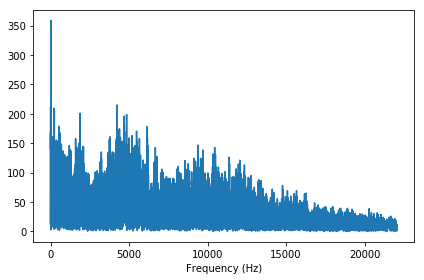

In [13]:
segment = wave.segment()
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

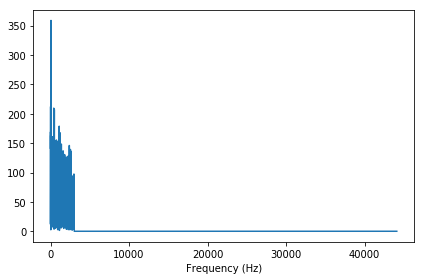

In [39]:
# 低通
segment = wave.segment()
spectrum = segment.make_spectrum()
spectrum.low_pass(3000)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
wave=spectrum.make_wave()
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

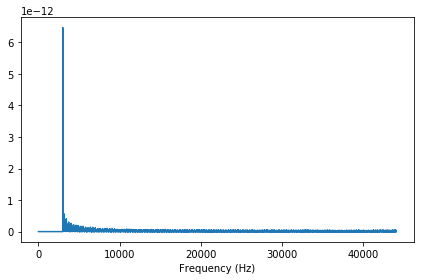

In [40]:
# 高通
segment = wave.segment()
spectrum = segment.make_spectrum()
spectrum.high_pass(3000)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
wave=spectrum.make_wave()
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

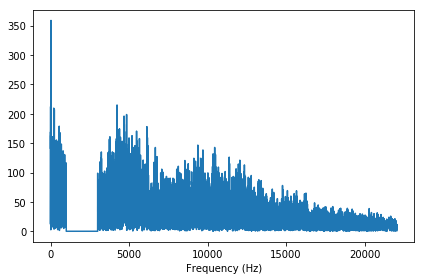

In [46]:
# 带阻
segment = wave.segment()
spectrum = segment.make_spectrum()
spectrum.band_stop(1000,3000)
spectrum.plot()
decorate(xlabel='Frequency (Hz)')
wave=spectrum.make_wave()
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

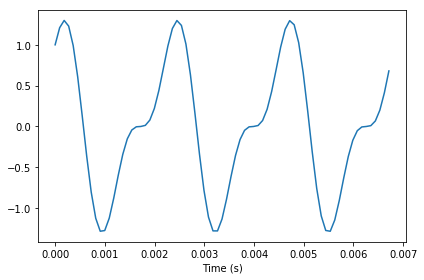

In [48]:
cos_sig = CosSignal(freq=440, amp=1.0, offset=0)
sin_sig = SinSignal(freq=880, amp=0.5, offset=0)
mix = sin_sig + cos_sig
period = mix.period
segment = wave.segment(start=0, duration=period*3)
wave = mix.make_wave(duration=1, start=0, framerate=11025)
segment = wave.segment(start=0, duration=period*3)
segment.plot()
decorate(xlabel='Time (s)')

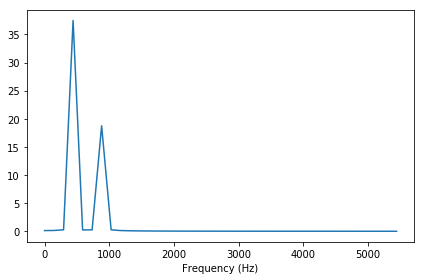

In [49]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

In [24]:
wave = mix.make_wave(duration=1, start=0, framerate=11025)
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [25]:
mix+=SinSignal(freq=201, amp=0.5, offset=0)
wave = mix.make_wave(duration=1, start=0, framerate=11025)
audio = Audio(data=wave.ys, rate=wave.framerate)
audio

In [28]:
def stretch(sign,ts,framerate):
    sign.ts+=ts
    sign.framerate*=framerate
    return sign

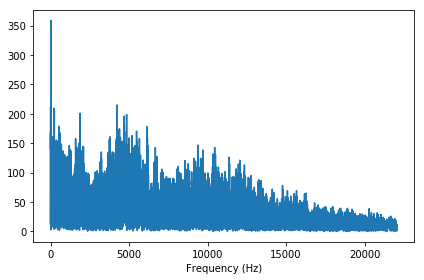

In [37]:
wave = read_wave('352205__inspectorj__smashing-wooden-fence-a.wav')
segment = wave.segment()
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

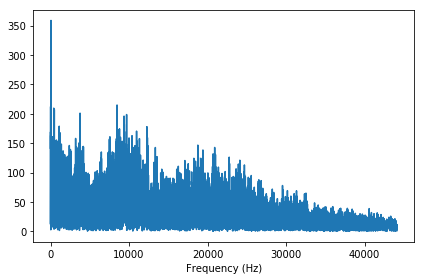

In [38]:
wave=stretch(wave,1,2)
segment = wave.segment()
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')